## Eric He

## Numerical Analysis

## Assignment 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set_style('darkgrid')

# 1. Prove the following
  statements, using the basic definition of eigenvalues and
  eigenvectors, or give a counterexample showing the statement is not
  true. Assume $A\in \mathbb R^{n\times n}$, $n\ge 1$.

## a)

If $\lambda$ is an eigenvalue of $A$ and $\alpha\in \mathbb R$,
  then $\lambda + \alpha$ is an eigenvalue of $A+\alpha I$, where $I$
  is the identity matrix.

### Answer

The statement is true; it follows from the fact that $(A - \lambda I)$ has determinant $0$ for eigenvalue $\lambda$. Then $A + \alpha I$ has determinant $0$ for eigenvalue $\lambda + \alpha.$

## b)

If $\lambda$ is an eigenvalue of $A$ and $\alpha \in \mathbb R$,
  then $\alpha\lambda$ is an eigenvalue of $\alpha A$.
  
### Answer

The statement is true; Note that by linearity of matrices, if we have an eigenvector $x$ such that $Ax = \lambda x$, then we have $\alpha Ax = \alpha \lambda x$. Then the eigenvalue $\lambda$ of $A$ becomes the eigenvalue $\alpha \lambda$ of $\alpha A$.

## c)

If $\lambda$ is an eigenvalue of $A$, then for any positive
  integer $k$, $\lambda^k$ is an eigenvalue of $A^k$.
  
### Answer

Let $x$ be the eigenvector corresponding to the eigenvalue $\lambda$ of $A$. 

Then $A^kx = AA...AAx = AA...A\lambda x = ... = \lambda^kx$  

## d)

If $B$ is "similar" to $A$, which means that there is a
  nonsingular matrix $S$ such that $B = SAS^{-1}$, then if $\lambda$
  is an eigenvalue of $A$, it is also an eigenvalue of $B$. How do the
  eigenvectors of $B$ relate to the eigenvectors of $A$?

### Answer

Conjugation by $S$ is simply a change of basis; conjugation of $A$ by $S$ means that an eigenvector $x$ of $A$ is also conjugated by $S$; thus the eigenvector of $SAS^{-1}$ is just $SxS^{-1}$.

## e)

Every matrix with $n\ge 2$ has at least two distinct
  eigenvalues, say $\lambda$ and $\mu$, with $\lambda\not=\mu$.
  
### Answer

False; the $nxn$ identity matrix $I$ has eigenvalue $1$ with multiplicity $n$.

## f)

Every real matrix has a real eigenvalue.

### Answer

False; the $90$-degree rotation matrix in $\mathbb{R}^2$

$$
\begin{bmatrix}
0 & 1 \\
-1 & 0 \\
\end{bmatrix}
$$

has eigenvalues $i, -i$.

## g)

If $A$ is singular, then it has an
  eigenvalue equal to zero.
  
### Answer

True; if $A$ is singular, then there exists $x \neq 0$ such that $Ax = 0$. If $A$ did not have an eigenvalue of $0$, then there is no vector $x$ such that $Ax = 0$

## h)

If all the eigenvalues of a matrix $A$ are zero, then $A = 0$.

### Answer

False; consider the matrix 

$$
A = 
\begin{bmatrix}
0 & 1 \\
0 & 0 \\
\end{bmatrix}
$$

and the the first basis vector 

$$b = 
\begin{bmatrix} 
1 
\\ 
0 
\end{bmatrix}
$$

$A$ has all eigenvalues $0$, but $A$ sends $b$ to the second basis vector $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$, which is not $0$.

# 2. 

## a)

Implement the Power Method for an arbitrary matrix $A\in \mathbb{R}^{n\times n}$ and an initial vector $x_0\in \mathbb{R}^n$.

### Answer

In [2]:
def power(A, x):
    vector = np.dot(A, x)
    return vector / np.linalg.norm(vector)

## b)

Use your code to find an eigenvector of 
$$
A = 
\begin{bmatrix}
- 2 & 1 & 4 \\ 
1 & 1 & 1 \\
4 & 1 & - 2
\end{bmatrix}
$$

starting with $x_0=(1,2,-1)^T$ and $x_0=(1,2,1)^T$. Report the first 5
iterates for each of the two initial vectors. Then use MATLAB's
$\mathtt{eig(A)}$ to examine the eigenvalues and eigenvectors of
$A$. Where do the sequences converge to? Why do the limits not seem to
be the same?

In [3]:
A = np.array([[-2, 1, 4],
              [1, 1, 1],
              [4, 1, -2]])

x_0 = np.array([1, 2, -1])
x_1 = np.array([1, 2, 1])

In [4]:
x_0_iterates = []
x_1_iterates = []

for i in range(5):
    x_0 = power(A, x_0)
    x_1 = power(A, x_1)
    x_0_iterates.append(x_0)
    x_1_iterates.append(x_1)

$x_0$ appears to be converging to the eigenvector with the largest eigenvalue.

In [5]:
x_0_iterates

[array([-0.43643578,  0.21821789,  0.87287156]),
 array([ 0.80829038,  0.11547005, -0.57735027]),
 array([-0.64483142,  0.05862104,  0.7620735 ]),
 array([ 0.73561236,  0.02942449, -0.67676337]),
 array([-0.69215012,  0.0147266 ,  0.72160331])]

$x_1$, on the other hand, is converging to the eigenvector with the largest eigenvalue.

In [6]:
x_1_iterates

[array([0.57735027, 0.57735027, 0.57735027]),
 array([0.57735027, 0.57735027, 0.57735027]),
 array([0.57735027, 0.57735027, 0.57735027]),
 array([0.57735027, 0.57735027, 0.57735027]),
 array([0.57735027, 0.57735027, 0.57735027])]

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(A)

In [8]:
eigenvalues

array([-6.00000000e+00,  3.00000000e+00,  2.77080206e-16])

In [9]:
eigenvectors

array([[ 7.07106781e-01, -5.77350269e-01,  4.08248290e-01],
       [-4.70543743e-17, -5.77350269e-01, -8.16496581e-01],
       [-7.07106781e-01, -5.77350269e-01,  4.08248290e-01]])

The limits are not the same because $x_1$ is orthogonal to the eigenvector with the largest eigenvalue and $x_0$ is not.

In [10]:
np.dot(eigenvectors[:,0], np.array([1, 2, 1]))

0.0

## c)

Implement the Inverse Power Method for an arbitrary matrix $A\in
  \mathbb{R}^{n\times n}$, an initial vector $x_0\in \mathbb{R}^n$
  and an initial eigenvalue guess $\theta\in\mathbb{R}$.
  
### Answer

In [11]:
def inverse_power(A, x, u):
    A_less_u = A - np.diag(u)
    return power(np.linalg.inv(A_less_u), x)

## d)

Use your code from (c) to calculate all eigenvectors of
  $A$. You may pick appropriate values for $\theta$ and the initial
  vector as you wish (obviously not the eigenvectors
  themselves). Always report the first 5 iterates and explain where
  the sequence converges to and why.
  
### Answer

We know that the eigenvalues are -6, 3, and 0. Let our guesses for $\mu$ be $\mu_1 = 5, \mu_2 = 2.75, \mu_3 = 0.25$.

In [12]:
mu_1 = np.array([5, 5, 5])
mu_2 = np.array([2.75, 2.75, 2.75])
mu_3 = np.array([0.25, 0.25, 0.25])

x_1_temp = np.array([1, 5, -3])
x_2_temp = np.array([1, 5, -3])
x_3_temp = np.array([1, 40, -3])

x_1_iterates = []
x_2_iterates = []
x_3_iterates = []

for i in range(5):
    x_1_temp = inverse_power(A, x_1_temp, mu_1)
    x_2_temp = inverse_power(A, x_2_temp, mu_2)
    x_3_temp = inverse_power(A, x_3_temp, mu_3)
    
    x_1_iterates.append(x_1_temp)
    x_2_iterates.append(x_2_temp)
    x_3_iterates.append(x_3_temp)

$x_1$ converges to the eigenvector with eigenvalue closest to $\mu_1 = 5$. This is the eigenvector of $A$ with eigenvalue $6$.

In [13]:
x_1_iterates

[array([-0.21146251, -0.97545609,  0.06139234]),
 array([0.3919796 , 0.86159096, 0.32251047]),
 array([-0.50220419, -0.713522  , -0.48854611]),
 array([0.54761728, 0.63480799, 0.54510011]),
 array([-0.56551839, -0.60074659, -0.56505972])]

$x_2$ converges to the eigenvector with eigenvalue closest to $\mu_2 = 2.75$. This is the eigenvector of $A$ with eigenvalue $3$.

In [14]:
x_2_iterates

[array([0.628234  , 0.35546727, 0.69207302]),
 array([0.56859408, 0.59627282, 0.56670937]),
 array([0.57818958, 0.57561388, 0.57824344]),
 array([0.57727216, 0.57750799, 0.57727062]),
 array([0.57735742, 0.57733593, 0.57735746])]

$x_3$ converges to the eigenvector with eigenvalue closest to $\mu_3 = 0.25$. This is the eigenvector of $A$ with eigenvalue $0$.

In [15]:
x_3_iterates

[array([ 0.4394746 , -0.78070988,  0.44424561]),
 array([-0.40501968,  0.81961163, -0.40521085]),
 array([ 0.4085287 , -0.8162122 ,  0.40853634]),
 array([-0.40822229,  0.81652242, -0.4082226 ]),
 array([ 0.40825063, -0.81649423,  0.40825065])]

# 3. Orthogonalization Methods



## a)

Given any two nonzero vectors $ x$ and $ y$
    in $\mathbb{R}^n$, construct a Householder matrix $H$, such that
    $H x$ is a scalar multiple of $ y$. Is the matrix $H$ unique?
    
### Answer
We are asked to find the matrix $H$ which reflects $x$ onto $y$.

The vector directly in between $x$ and $y$ is the one which will reflect $x$ onto $y$. This vector is simply $z = x - y$.

Then the corresponding Householder matrix $H$ is given by $I - \dfrac{2}{(x - y)^T(x - y)}(x - y)(x - y)^T$

The matrix $H$ is not unique since there are two directions we can reflect $x$ onto $y$: through $z_1 = x - y$ or $z_2 = y - x$.

## b)

Use Householder matrices to transform the matrix $A$ into tridiagonal form.
    $$
    A = \begin{bmatrix} 2 & 1 & 2 & 2 \\ 1 & - 7 & 6 & 5 \\ 2
      & 6 & 2 & - 5\\ 2& 5 & - 5 & 1 
    \end{bmatrix}.
    $$
    
### Answer

In [16]:
# return householder matrix for vector x
def Householder(x):
    return np.identity(x.shape[0]) - (2 / np.inner(x,x) * np.outer(x, x))

# calculate the reflection vector required to send a vector x to the basis vector
def reflection_vector(x):
    x = x.astype('float64')
    if x[0] != 0:
        c = np.sign(x[0]) * np.sqrt(np.inner(x, x))
    else:
        c = np.sqrt(np.inner(x, x))
    x[0] = x[0] + c
    return x

# use the above two methods to tridiagonalize a matrix A
def tridiagonalize(A):
    shape = A.shape[0]
    for i in range(shape - 1):
        x = A[i + 1:, i]
        v = np.zeros(shape)
        v[i+1:] = reflection_vector(x)
        H = Householder(v)
        # conjugate by H
        A = H.dot(A).dot(H)
    return A

In [17]:
A = np.array([[2, 1, 2, 2],
              [1, -7, 6, 5],
              [2, 6, 2, -5],
              [2, 5, -5, 1]])

tridiagonalize(A).astype('int')

array([[  2,  -3,   0,   0],
       [ -3,   0,  -5,   0],
       [  0,  -5, -11,   3],
       [  0,   0,   3,   6]])

## c)

Use Householder matrices to compute the QR-factorization of
    the matrix from homework 3, problem 6, i.e.:
$$
\begin{bmatrix}
  9 & -6\\
  12 & -8\\
  0 & 20
\end{bmatrix}.
$$

    
### Answer

In [18]:
A = np.array([[9, -6],
              [12, -8],
              [0, 20]])
Q = []
for i in range(A.shape[1]):
    Q_i = np.identity(3)
    Q_i[i:,i:] = Householder(reflection_vector(A[i:, i]))
    Q.append(Q_i)
    A = Q_i.dot(A)

#### The Q matrix

In [19]:
import functools
# dot all the matrices in the list of Q_i Q
functools.reduce(np.dot, Q)

array([[-0.6,  0. ,  0.8],
       [-0.8,  0. , -0.6],
       [ 0. , -1. ,  0. ]])

#### The R matrix

In [20]:
A.astype('int')

array([[-15,  10],
       [  0, -20],
       [  0,   0]])

## d)


Use Givens rotations to transform the
    vector
$$x =
\begin{bmatrix}
4\\ -3\\1
\end{bmatrix}
$$
    to a multiple of the first unit vector. Specify the
    Givens rotations you used.

### Answer

The first Givens matrix rotates the first and second components, sending the second to 0.

In [21]:
x = np.array([4, -3, 1])

r = np.sqrt(np.power(4, 2) + np.power(-3, 2))
c = 4 / r
s = 3 / r

A = np.identity(3)
A[0:2, 0:2] = np.array([[c, -s],
                        [s, c]])

#### The first Givens rotation

In [22]:
A

array([[ 0.8, -0.6,  0. ],
       [ 0.6,  0.8,  0. ],
       [ 0. ,  0. ,  1. ]])

In [23]:
x = A.dot(x).astype('int')
x

array([5, 0, 1])

#### The second Givens rotation

We now build the second Givens rotation to rotate the first and third components.

In [24]:
r = np.sqrt(np.power(x[0], 2) + np.power(x[2], 2))
c = x[0] / r
s = -x[2] / r
A = np.identity(3)
A[0, 0] = c
A[0, 2] = -s
A[2, 0] = s
A[2, 2] = c

In [25]:
A

array([[ 0.98058068,  0.        ,  0.19611614],
       [ 0.        ,  1.        ,  0.        ],
       [-0.19611614,  0.        ,  0.98058068]])

In [26]:
A.dot(x)

array([5.09901951, 0.        , 0.        ])

# 4.

Let the matrix $A\in \mathbb{R}^{n\times n}$ be defined by its components
$$ a_{i,i}=2i \quad \text{for}\quad i=1,...n, $$
$$ a_{i,i+1}=- i, \quad a_{i+1,i}= - i\quad \text{for}\quad i=1,...n-1, $$
the remaining components are zero.

## a)

Sketch the Gerschgorin discs of $A$.

### Answer

.

.

.

.

.

.

.

.

.

.


## b)

Use Gerschgorin's Theorem and facts about symmetric matrices to show that all eigenvalues of $A$ are real numbers, larger or equal $1$.

### Answer

The minimum of the left endpoints of the Gershgorin discs are at 1. Because $A$ is symmetric, the eigenvalues of $A$ are real. Thus the eigenvalues of $A$ are all real numbers which are larger than or equal to 1.

## c)

Using Gerschgorin discs, find an upper bound for the eigenvalues of $A$.

### Answer

All eigenvalues are bounded above by 3n, since that is the endpoint of the largest Gershgorin disc situated at x = 2n.

# 5.

An efficient way to find individual roots of a
  polynomial is to use Newton's method. However, as we have seen,
  Newton's method requires an initialization close to the root one
  wants to find, and it can be difficult to find *all* roots of a
  polynomial. Luckily, one can use the relation between eigenvalues
  and polynomial roots to find all roots of a given polynomial.  Let us
  consider a polynomial of degree $n$ with leading coefficient $1$:
  $$ p(x) = a_0+a_1x+\ldots+a_{n-1}x^{n-1} + x^n \quad \text{ with } a_i\in \mathbb R. $$

## a)

Show that $p(x)$ is the characteristic polynomial of the
    matrix (sometimes called a companion matrix for $p$)
$$ A_p :=
\begin{bmatrix}
  0 &&& - a_0\\
  1  &&& - a_1\\
    & \ddots && \vdots \\
    &&   1  & - a_{n-1}
\end{bmatrix} \in \mathbb R^{n\times n}.
$$
    
Thus, the roots of $p(x)$ can be computed as the eigenvalues of
    $A_p$ using the QR algorithm (as implemented, e.g., in MATLAB's
    `eig` function). 
    
### Answer

The eigenvalues of $A_p$ are given by the determinant of $I - A_p$.

Using cofactors, we can break up the computation of the determinant of $I - A_p$ into the sum of two pieces: $-\lambda \det A_{p-1}$ and $-1^{p+1} a_0 \det Q$, where $Q$ is a matrix with $-1$ down the diagonal and $-\lambda$ down the upper diagonal. The matrix $Q$ in dimension $p - 1$, being upper diagonal, has determinant $-1^{p-1}$, the multiplication of the diagonal entries; this means that $a_0$ is multiplied by $-1^{2p} = 1$.

Then $\det I - A_p = a_0 + \lambda \det(I - A_{p-1})$, where $A_{p-1}$ is the lower submatrix excluding the first row and column of $A_p$.

Proceeding by an inductive argument on $\{A_{p-i}\}_{i=1}^{p-1}$, we find that the determinant of $I - A_p = \sum_{i=0}^p \lambda^i a_i$, completing the proof.

## b)

Let us consider Wilkinson's polynomial $p_w(x)$ of order $15$,
    i.e., a polynomial with the roots $1,2,\ldots,15$:
    $$
    p_w(x) = (x-1)\cdot(x-2)\cdot \ldots \cdot (x-15).
    $$
The corresponding coefficients can be found using the
`poly()` function. Use these coefficients in the matrix
$A_p$ to find the original roots again, and compute their
error. 
    
### Answer

In [27]:
roots = (np.arange(15) + 1)
coefs = np.poly(roots)

A_p = np.zeros([15, 15])

# insert roots into the last column
A_p[:,14] = -1 * np.flip(coefs[1:], axis=0)

# insert identity into left off-diagonal
A_p[1:,:14] = np.identity(14)

# get eigenvalues of A_p
eigenvalues, eigenvectors = np.linalg.eig(A_p)

The eigenvalues of $A_p$ are displayed below.

In [28]:
eigenvalues

array([ 1.        ,  2.        ,  3.        ,  4.00000001,  4.99999997,
        6.00000016,  6.99999932,  8.00000224,  8.99999481, 10.00000797,
       10.99999225, 12.0000043 , 12.99999906, 13.9999998 , 15.00000011])

A direct computation of the roots is given below.

In [29]:
np.roots(coefs)

array([15.00000008, 13.99999929, 13.00000283, 11.99999361, 11.00000924,
        9.99999088,  9.00000635,  7.99999684,  7.00000113,  5.99999972,
        5.00000005,  3.99999999,  3.        ,  2.        ,  1.        ])

There is a small amount of error for several of the roots, but the total error is still small.

In [30]:
np.sum(roots - np.roots(coefs))

-1.1013412404281553e-13

# 6.

As mentioned in class, the Google page rank
  algorithm has a lot to do with the eigenvector corresponding to the
  largest eigenvalue of a so-called stochastic matrix, which models
  the links between websites. Stochastic matrices have non-negative
  entries and each column sums to 1, and one can show (under a few
  technical assumptions) that it has the eigenvalues
  $\lambda_1=1>|\lambda_2|\ge\ldots\ge|\lambda_n|$. Thus, we can use
  the power method
  to find the eigenvector $v$ corresponding to $\lambda_1$, which
  can be shown to have either all negative or all positive entries.
  These entries can be interpreted as the importance of individual
  websites.

In [31]:
n = 150

# initialize A with random row swaps
A = 0.5 * np.identity(n)
A = A[np.random.permutation(np.arange(n))]

In [32]:
# generate noise matrix
Noise = np.random.normal(size=(n, n))
Noise[Noise < 2] = 2
Noise = Noise - 2

# add noise to A
A = A + Noise

# delete the diagonal entries
A = A - np.diag(np.diag(A))

# some weird transformation
A2 = A.sum(axis=1)
A2[A2 < 10 ** -10] = 10 ** -10

L = np.dot(A, np.diag(A2 ** -1))

## a)

Plot the sparsity structure of $L$ (i.e., the
  nonzero entries in the matrix) using the command `spy`. Each
  non-zero entry corresponds to a link between two websites.
  
### Answer

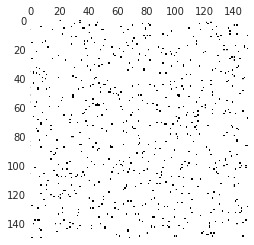

In [33]:
plt.spy(L)

## b)

Plot the (complex) eigenvalues of $L$ by plotting the real part
  of the eigenvalues on the $x$-axis, and the imaginary part on the
  $y$-axis. (Please make sure that the plotted eigenvalues are
    not connected.) Additionally, plot the unit circle and check that
  all eigenvalues are inside the unit circle, but $\lambda_1=1$.
  
### Answer

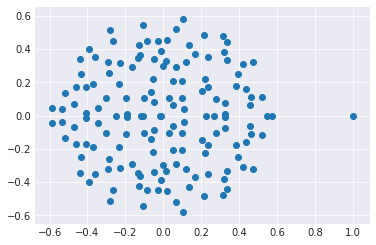

In [34]:
eig = np.linalg.eigvals(L)

real = np.real(eig)

im = np.imag(eig)

plt.scatter(real, im)

## c)

The matrix $L$ contains many zeros. One of the technical
  assumptions for proving theorems is that all entries in $L$ are
  positive.  As a remedy, one considers the matrices $S = \kappa L +
  (1-\kappa) E$, where $E$ is a matrix with entries $1/n$ in every
  component
  
### Answer

In [35]:
K = [0.25, 0.5, 0.75]
E = np.ones([n, n]) / n

eig_real = []
eig_im = []
for k in K:
    S = k * E + (1 - k) * L
    eig = np.linalg.eigvals(S)
    eig_real.append(np.real(eig))
    eig_im.append(np.imag(eig))

For larger $\kappa$, the eigenvalues are clustered more closely around $0$.

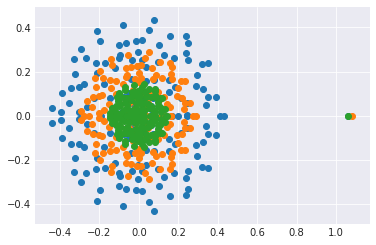

In [36]:
for i in range(len(eig_real)):
    plt.scatter(eig_real[i], eig_im[i])

The power method converges more quickly for $\kappa < 1$ because the largest eigenvalue becomes larger relative to the second largest eigenvalue for smaller $\kappa$, and the power method converges at a speed relative to the ratio of the second largest eigenvalue with respect to the largest eigenvalue.